### Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

In [177]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
import warnings 
warnings.filterwarnings('ignore')

In [278]:
df = pd.read_csv("data.csv")  ## creating Data frame

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

### Observation:-
1. there are 39 feature in this dataset,Lable is fraud_reported.
2. insured_zip , policy_number showing as Int64 value while it should be a Object data type.
3. _c39 has 0 record , it means this feature has no value inserted , we can delete this feature.

In [180]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [181]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [182]:
df['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

### Observation:-

Above three Feature contains ? mark as value . we need to replace these value with NaN 

### No of ? value is high in catagorical field, replacing them with NaN and then with Mode of the colum will affect the result, hence we will replace this value with 'Unknown' as of now.

In [183]:
df['property_damage'].replace('?', 'UNKNOWN', inplace = True)

In [184]:
df['collision_type'].replace('?', 'UNKNOWN', inplace = True)

In [185]:
df['police_report_available'].replace('?', 'UNKNOWN', inplace = True)

In [186]:
df['police_report_available'].value_counts()

NO         343
UNKNOWN    343
YES        314
Name: police_report_available, dtype: int64

### We have replace ? mark with another word 'UNKNOWN'

In [187]:
#df.describe(include='all')
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


### Observation:-
1. All Feature having numerical values has been described in above table.
2. Count has same value for all independent variale hence we can say there is no missing value.
3. Some Columns are catagorical but having values in numerical format 0 ,1, 2, 3 , for example Witness,bodily_injuries and number_of_vehicles_involved.
4. Mean and Median of these column has some differnce hence we can say data is not normally distributted for some columns and having skewness.
5. means and Max value for column capital-gains has huge difference, means this column has outlier exist.means and median for this column having huge difference , we can say this column has high degree of skewness as well.


In [188]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

### Observation:-
1. Unique value count of data set show that there are some catagorical columns wihch has all values unique. such columns will not contribute in model learning and hace very less correlation , we can delete such columns.
Columns policy_number, policy_bind_date,insured_zip,incident_location are such columns and we can drop these columns.

In [189]:
df.drop(['policy_number', 'policy_bind_date', 'insured_zip','incident_location','_c39'], axis = 1,inplace=True)

In [190]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,UNKNOWN,Minor Damage,Police,VA,Riverwood,8,1,UNKNOWN,0,0,UNKNOWN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10/1/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,UNKNOWN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,UNKNOWN,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [191]:
df.shape

(1000, 35)

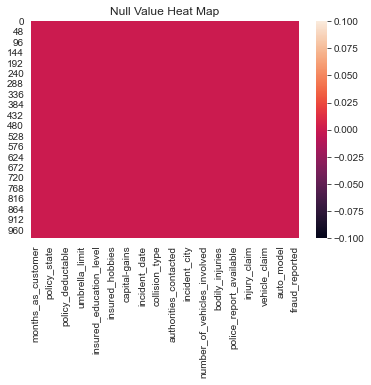

In [192]:
sns.heatmap(df.isnull())
plt.title("Null Value Heat Map")
plt.show()

### Null value not exist in this dataset 

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_hobbies              1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

### EDA

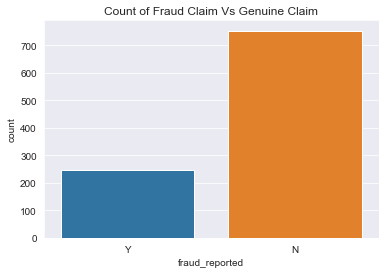

In [194]:
sns.countplot(x='fraud_reported', data=df)
plt.title("Count of Fraud Claim Vs Genuine Claim")
plt.show()

## Observation:- 
Total # of Fraud claim are very less compare to Genuine claim, we can say data is imbalance.

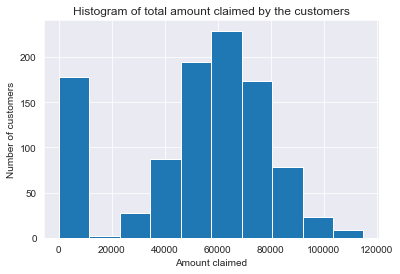

In [279]:
plt.hist(df.total_claim_amount)
plt.title("Histogram of total amount claimed by the customers")
plt.xlabel("Amount claimed")
plt.ylabel("Number of customers")
plt.show()

## Observation:-
Maximum claims filed for 50k to 80k amount.

Text(0, 0.5, 'Number of customers')

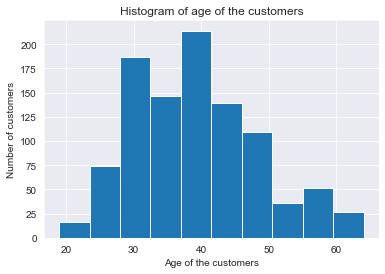

In [196]:
plt.hist(df.age)
plt.title("Histogram of age of the customers")
plt.xlabel("Age of the customers")
plt.ylabel("Number of customers")

## Observation:- 
Maximum customer in this data fall between 30 to40 age who file claim.

<AxesSubplot:xlabel='insured_sex,age'>

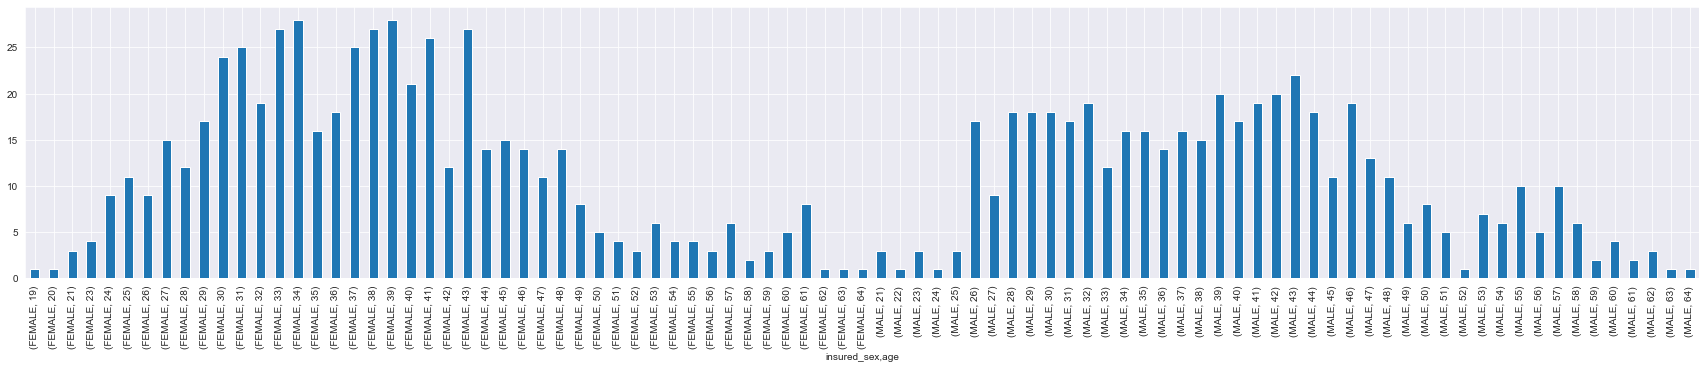

In [197]:
df.groupby(['insured_sex','age']).fraud_reported.count().plot(kind='bar',figsize=(30,5))

## Observation:-
Claim required are more from female customer then male customers.

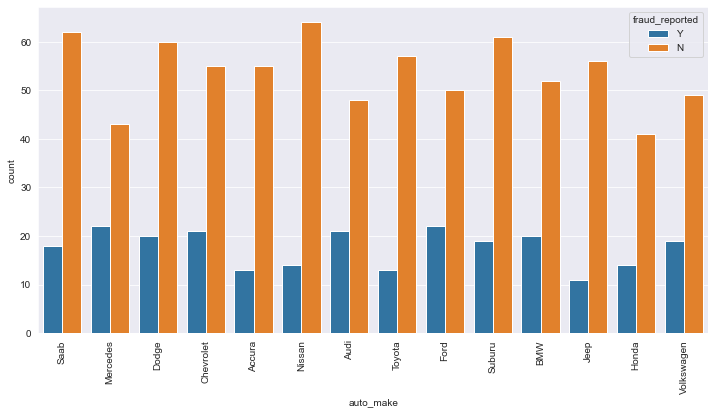

In [280]:
plt.figure(figsize=(12, 6))
sns.countplot(x='auto_make', data=df, hue='fraud_reported', )
plt.xticks(rotation = 90)
plt.show()

### Observation:-
1. Almost every type of car having insurance fraud count, but there is a pattern that car like Frod, Audi Marcadeas, Chevrolet has comparativly much fraud claim cound. could be because these are famous cars and user of these cars are much more then other cars, 

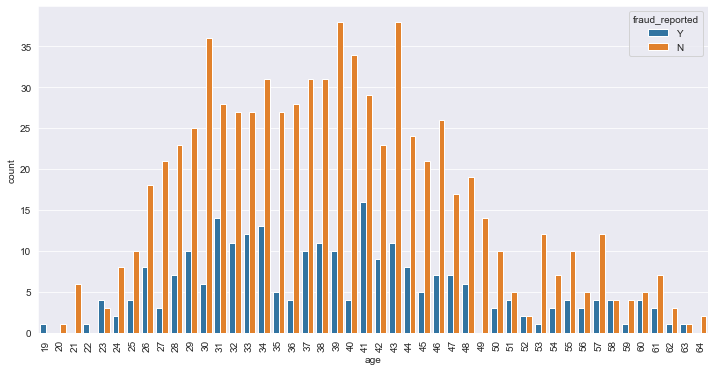

In [281]:
plt.figure(figsize=(12, 6))
sns.countplot(x='age', data=df, hue='fraud_reported')
plt.xticks(rotation = 90)
plt.show()

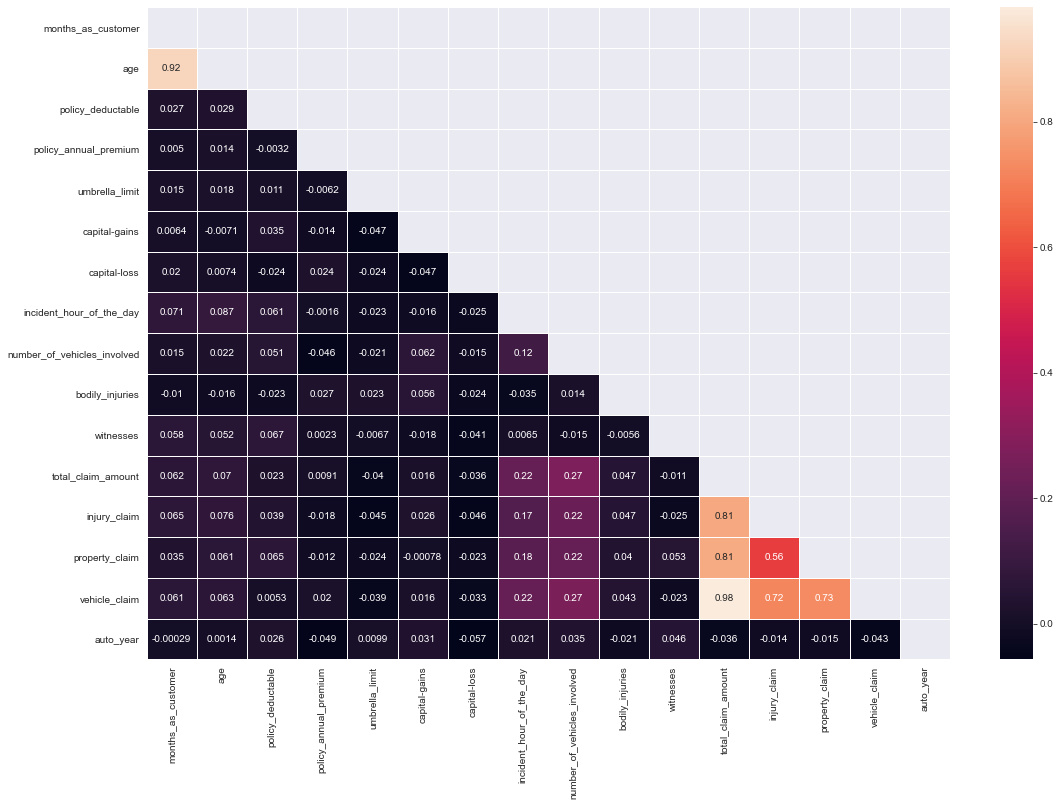

In [200]:
# checking for multicollinearity

plt.figure(figsize = (18, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

## Observation:-

1. Month as customer and age had a correlation of 0.92. Probably because drivers buy auto insurance when they own a car and this time measure only increases with age.
2. Incident severity and different types of claims have a clear correlation
3. injury_claim, Property claim and vhical claim has high correlation with total claim, this is because total claim is dirrectly related with these three different type of claim.

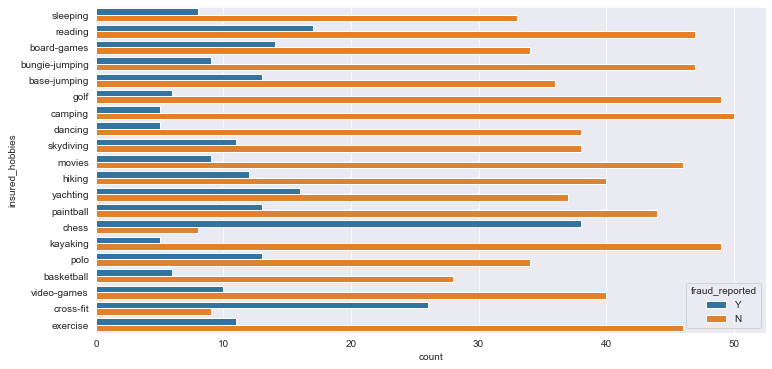

In [201]:
plt.figure(figsize=(12, 6))
sns.color_palette("rocket", as_cmap=True)
#sns.set_style('whitegrid')
sns.countplot(y='insured_hobbies', data=df, hue='fraud_reported')
plt.show()

### Observation:-
Highest Fraud case reported for the people who has hobby as chass or cross-fit.

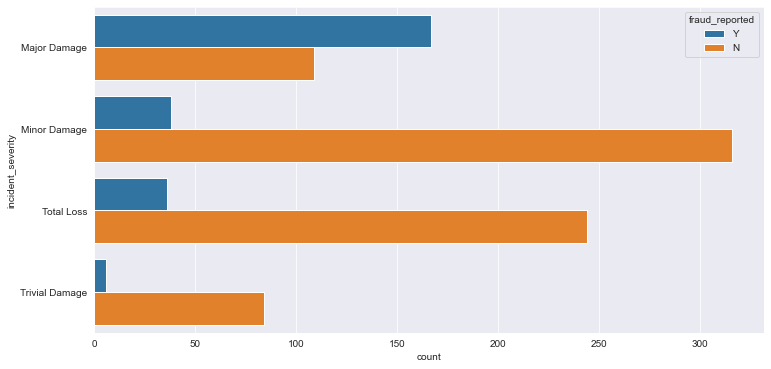

In [202]:
plt.figure(figsize=(12, 6))
sns.color_palette("rocket", as_cmap=True)
#sns.set_style('whitegrid')
sns.countplot(y='incident_severity', data=df, hue='fraud_reported')
plt.show()

## Observation:-
Major Damage has high ratio of fraud.

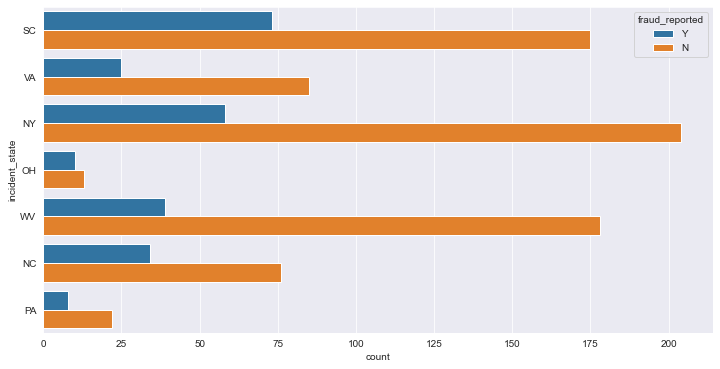

In [203]:
plt.figure(figsize=(12, 6))
sns.color_palette("rocket", as_cmap=True)
#sns.set_style('whitegrid')
sns.countplot(y='incident_state', data=df, hue='fraud_reported')
plt.show()

## Observation:-
SC has comparativly high Fraud cases.

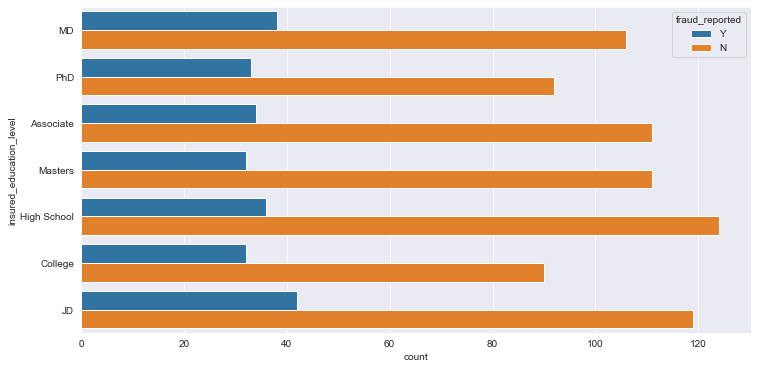

In [205]:
plt.figure(figsize=(12, 6))
sns.color_palette("rocket", as_cmap=True)
#sns.set_style('whitegrid')
sns.countplot(y='insured_education_level', data=df, hue='fraud_reported')
plt.show()

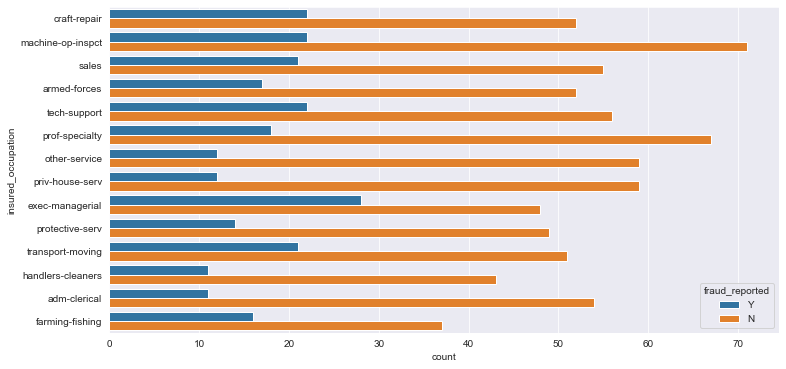

In [206]:
plt.figure(figsize=(12, 6))
sns.color_palette("rocket", as_cmap=True)
#sns.set_style('whitegrid')
sns.countplot(y='insured_occupation', data=df, hue='fraud_reported')
plt.show()

## Observation:-
poeple working on Exec-Managerial role has high fraud case.

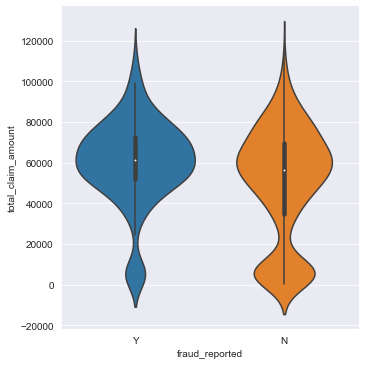

In [207]:
g = sns.catplot(x = 'fraud_reported', y ='total_claim_amount', data=df,kind='violin')
plt.show()

### Observation:-

There seem to be more frauds than non-fraud claims along the mean of total claims

### Data Processing
Cleaning up the data and prepare it for machine learning model.

In [208]:
df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
df['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)

df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,UNKNOWN,Minor Damage,Police,VA,Riverwood,8,1,UNKNOWN,0,0,UNKNOWN,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10/1/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,UNKNOWN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,UNKNOWN,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


In [209]:
df.auto_year.value_counts()  # check the spread of years to decide on further action.

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

auto_year is catagorical variable, it has 23 diferent values, we can not create so many feature , hence we will replace this field with difference of age from current year and make it numarical field. 

In [210]:
df['vehicle_age'] = 2021 - df['auto_year'] # Deriving the age of the vehicle based on the year value 
df['vehicle_age'].head(30)

0     17
1     14
2     14
3      7
4     12
5     18
6      9
7      6
8      9
9     25
10    19
11    15
12    21
13    11
14    18
15    22
16     9
17     6
18     6
19     7
20    10
21    25
22    21
23    10
24    16
25    15
26    16
27    18
28    12
29    10
Name: vehicle_age, dtype: int64

In [211]:
bins = [-1, 3, 6, 9, 12, 17, 20, 24]  # Factorize according to the time period of the day.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
df['incident_period_of_day'] = pd.cut(df.incident_hour_of_the_day, bins, labels=names).astype(object)
df[['incident_hour_of_the_day', 'incident_period_of_day']].head()

,incident_hour_of_the_day,incident_period_of_day
0,5,early_morning
1,8,morning
2,7,morning
3,5,early_morning
4,20,evening


In [212]:
pd.set_option('display.max_columns', None) ##to display all the columns
pd.set_option('display.max_rows', None) ##to display all the columns
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,vehicle_age,incident_period_of_day
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,1,17,early_morning
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,UNKNOWN,Minor Damage,Police,VA,Riverwood,8,1,UNKNOWN,0,0,UNKNOWN,5070,780,780,3510,Mercedes,E400,2007,1,14,morning
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0,14,morning
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10/1/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,UNKNOWN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,7,early_morning
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,UNKNOWN,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,0,12,evening


In [213]:
# Check on categorical variables:
df.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'incident_period_of_day'],
      dtype='object')

In [214]:
# dropping unimportant columns

df = df.drop(columns = [
    'incident_date', 
    'auto_year', 
    'incident_hour_of_the_day'])

df.head(2)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_period_of_day
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,1,17,early_morning
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,UNKNOWN,Minor Damage,Police,VA,Riverwood,1,UNKNOWN,0,0,UNKNOWN,5070,780,780,3510,Mercedes,E400,1,14,morning


### collision_type, property_damage, police_report_available contain many missing values. So, first isolate these variables, inspect these individually for spread of category values

In [215]:

df.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
UNKNOWN            178
Name: collision_type, dtype: int64

##### Applying one-hot encoding to convert all categorical variables except 'collision_type', 'property_damage', 'police_report_available', 'fraud_reported'

In [216]:
onehot = ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level','insured_occupation', 'insured_hobbies', 'insured_relationship',
          'incident_type', 
          'incident_severity',
          'authorities_contacted', 
          'incident_state', 
          'incident_city',
          'auto_make', 
          'auto_model',
          'incident_period_of_day']

In [217]:
for val in onehot:
    print(val)
    p = df[[val]]
    temp = pd.get_dummies(p)
    df=pd.concat([df,temp],axis = 1)
    df.drop(val, axis = 1, inplace = True)

policy_state
policy_csl
insured_sex
insured_education_level
insured_occupation
insured_hobbies
insured_relationship
incident_type
incident_severity
authorities_contacted
incident_state
incident_city
auto_make
auto_model
incident_period_of_day


In [218]:
df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,collision_type,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,vehicle_age,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight
0,328,48,1000,1406.91,0,53300,0,Side Collision,1,YES,1,2,YES,71610,6510,13020,52080,1,17,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [219]:
#encoding other columns  'collision_type','property_damage', 'police_report_available', "fraud_reported"

df['property_damage'].replace(to_replace='YES', value=1, inplace=True)
df['property_damage'].replace(to_replace='NO', value=0, inplace=True)
df['property_damage'].replace(to_replace='UNKNOWN', value=0, inplace=True)
df['police_report_available'].replace(to_replace='YES', value=1, inplace=True)
df['police_report_available'].replace(to_replace='NO', value=0, inplace=True)
df['police_report_available'].replace(to_replace='UNKNOWN', value=0, inplace=True)

In [220]:
#Collision type has multiple values along with  unknown, we will catageorise unknown as another type of collision.
from sklearn.preprocessing import LabelEncoder
df['collision_type'] = LabelEncoder().fit_transform(df['collision_type'])


In [221]:
df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,collision_type,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,vehicle_age,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight
0,328,48,1000,1406.91,0,53300,0,2,1,1,1,2,1,71610,6510,13020,52080,1,17,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,

In [222]:
df.shape

(1000, 161)

### All columns has been converted into numerical value and dataset shape has increasd , now there are 160 features.

In [223]:
x = df.drop(columns = ['fraud_reported'], axis=1)
y = df['fraud_reported']

In [224]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(x)
x = pd.DataFrame(data_trans, columns = x.columns)
x.skew()

months_as_customer                       -0.135661
age                                      -0.001945
policy_deductable                         0.023988
policy_annual_premium                     0.004758
umbrella_limit                           -7.865930
capital-gains                             0.038722
capital-loss                              0.090488
collision_type                           -0.118845
number_of_vehicles_involved               0.363693
property_damage                           0.863806
bodily_injuries                          -0.128799
witnesses                                -0.153648
police_report_available                   0.802728
total_claim_amount                       -0.510354
injury_claim                             -0.415781
property_claim                           -0.358814
vehicle_claim                            -0.522718
vehicle_age                              -0.103975
policy_state_IL                           0.685977
policy_state_IN                

In [227]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = f1_score(y_test,predrf)
    if acc >maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is", maxAccu, "on Random_state",maxRS)

Best accuracy is 0.723076923076923 on Random_state 95


In [228]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=95)

### Data is imbalance hence we will use over sampling get correct no of sample

In [229]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=10) 
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 182
Before OverSampling, counts of label '0': 568 

After OverSampling, the shape of train_X: (1136, 160)
After OverSampling, the shape of train_y: (1136,) 

After OverSampling, counts of label '1': 568
After OverSampling, counts of label '0': 568


In [243]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import xgboost 
LR = LogisticRegression()
rf = RandomForestClassifier()
knn= KNeighborsClassifier(n_neighbors=5)
#sv = SVC()
ad= AdaBoostClassifier()
xg = XGBClassifier()
model = [LR,rf,knn,ad,xg]

In [244]:
from sklearn.model_selection import cross_val_score
score_mod = {'Model':[],'Accurecy':[],'Cross_val':[], 'diff':[]}
for val in model:
    val.fit(x_train,y_train)
    pred = val.predict(x_test)
    print("\n Prediction and Accuracy of model ", str(val))
    score_mod['Model'].append(str(val))
    print(accuracy_score(y_test,pred))
#   print(f1_score(y_test,pred))
    score_mod['Accurecy'].append(accuracy_score(y_test,pred)*100)
#   score_mod['F1-score'].append(f1_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    scr = cross_val_score(val,x_train,y_train, cv=5)
    score_mod['Cross_val'].append(scr.mean()*100)
    score_mod['diff'].append(scr.mean()*100 - accuracy_score(y_test,pred)*100)


 Prediction and Accuracy of model  LogisticRegression()
0.856
[[167  18]
 [ 18  47]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       185
           1       0.72      0.72      0.72        65

    accuracy                           0.86       250
   macro avg       0.81      0.81      0.81       250
weighted avg       0.86      0.86      0.86       250


 Prediction and Accuracy of model  RandomForestClassifier()
0.804
[[172  13]
 [ 36  29]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       185
           1       0.69      0.45      0.54        65

    accuracy                           0.80       250
   macro avg       0.76      0.69      0.71       250
weighted avg       0.79      0.80      0.79       250


 Prediction and Accuracy of model  KNeighborsClassifier()
0.74
[[174  11]
 [ 54  11]]
              precision    recall  f1-score   support

           0       0.76     

In [245]:
result1=pd.DataFrame(score_mod)
result1

,Model,Accurecy,Cross_val,diff
0,LogisticRegression(),85.6,80.800000,-4.800000
1,RandomForestClassifier(),80.4,76.800000,-3.600000
2,KNeighborsClassifier(),74.0,72.133333,-1.866667
3,AdaBoostClassifier(),83.6,79.466667,-4.133333
4,"XGBClassifier(base_score=0.5, booster='gbtree'...",81.2,82.666667,1.466667


In [254]:
#!pip install hyperopt 

  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491059 sha256=19c0968f89d045636a567f9ea3737e5348f3219a70a1aa05362a477cc9ec3ffd
  Stored in directory: c:\users\hemkashi\appdata\local\pip\cache\wheels\8e\70\28\3d6ccd6e315f65f245da085482a2e1c7d14b90b30f239e2cf4
Successfully built future
  Attempting uninstall: decorator
    Found existing installation: decorator 5.0.6
    Uninstalling decorator-5.0.6:
      Successfully uninstalled decorator-5.0.6


### Observation:- 

Highest score coming for Logistic regression but cross val score is low for this model, means Logistic regression score is coming because of overfitting.

on the other hand XGBoost also has good accuracy score and cross val score is also high for this model, hence we can say that XGBoost is best model. 

We will do Hyper parameter tuning for XGBoost Model.

# Hyper Parameter Tuning for XGBoost Classification Model

In [259]:
from sklearn.model_selection import GridSearchCV
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
param_tuning = { 'learning_rate': [0.01, 0.1],
                'max_depth': [3, 5, 7, 10],
                'min_child_weight': [1, 3, 5],
                'subsample': [0.5, 0.7],
                'colsample_bytree': [0.5, 0.7],
                'n_estimators' : [100, 200, 500],
                'objective': ['reg:squarederror'] }
xg = XGBClassifier()

grid_search = GridSearchCV(estimator=xg, param_grid=param_tuning, n_jobs=-1, cv=4, scoring='accuracy')
result=grid_search.fit(x_train, y_train)
#print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
pred = grid_search.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Best Hyperparameters: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 500, 'objective': 'reg:squarederror', 'subsample': 0.7}
0.844
[[161  24]
 [ 15  50]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       185
           1       0.68      0.77      0.72        65

    accuracy                           0.84       250
   macro avg       0.80      0.82      0.81       250
weighted avg       0.85      0.84      0.85       250



## Observation:- XGBoost hyper parameter tuning gave 84.4 persend accuracy score are tuning.

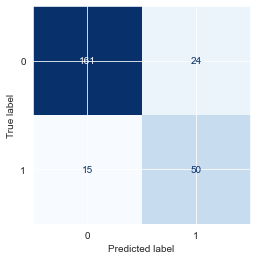

In [269]:
from sklearn.metrics import plot_confusion_matrix
confusion_mat = confusion_matrix(y_test,pred)
plot_confusion_matrix(grid_search, x_test, y_test,cmap=plt.cm.Blues,colorbar=False) 
plt.show()

### AUC ROC Curve for XGBoost

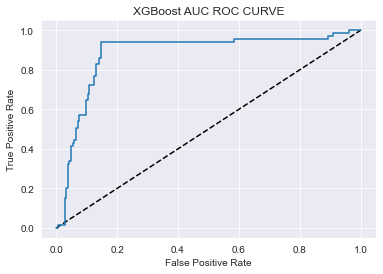

In [272]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#model = DecisionTreeClassifier()
#model.probability = True
#grid_search.fit(x_train,y_train)
y_pred_prob=grid_search.predict_proba(x_test)[:,1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost AUC ROC CURVE")
plt.show()

## Saving Best Model

In [273]:
import joblib 
joblib.dump(grid_search,'Automobile_Insurence_fraud.pki')

['Automobile_Insurence_fraud.pki']

In [274]:
model = joblib.load('Automobile_Insurence_fraud.pki')

In [275]:
prediction = model.predict(x_test)

In [276]:
prediction = pd.DataFrame(prediction)

In [277]:
prediction.to_csv('Result.csv')